<a href="https://colab.research.google.com/github/varunkr24/Capstone-Project/blob/Python/Capstone_Project_CV2_Group_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - CV2 (Group 2)
## Object Detcction - CAR
### DOMAIN: Automotive. Surveillance.
#### CONTEXT:
Computer vision can be used to automate supervision and generate action appropriate action trigger if the event is predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of the car, type, colour, number plates etc.
#### DATA DESCRIPTION:
The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.
#### Data description:
‣ Train Images: Consists of real images of cars as per the make and year of the car.
‣ Test Images: Consists of real images of cars as per the make and year of the car.
‣ Train Annotation: Consists of bounding box region for training images.
‣ Test Annotation: Consists of bounding box region for testing images.
Dataset has been attached along with this project. Please use the same for this capstone project.
Dataset: https://drive.google.com/drive/folders/1y6JWx2CpsOuka00uePe72jNgr7F9sK45?usp=sharing
Original dataset link for your reference only: https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder
Reference: 3D Object Representations for Fine-Grained Categorisation, Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei 4th IEEE Workshop on 3D Representation and Recognition, at ICCV 2013 (3dRR-13). Sydney, Australia. Dec. 8, 2013.
#### PROJECT OBJECTIVE: 
Design a DL based car identification model.

## Milestone 1

### Input: Interim report

#### Process:
- Step 1: Import the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from skimage.transform import resize
from skimage.io import imread
import random
from os import path
from google.colab import drive
import cv2

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATA_SET_PATH = "/content/drive/MyDrive/Dataset/"
ANNOTATION_PATH = DATA_SET_PATH + "Annotations/"
TRAIN_IMAGES_DIR_PATH = DATA_SET_PATH + "Car Images/Train Images/"
TEST_IMAGES_DIR_PATH = DATA_SET_PATH + "Car Images/Test Images/"

Loading Car Makes

In [4]:
car_makes_df = pd.read_csv(DATA_SET_PATH + "Car names and make.csv", header=None, names=["car_make"])

In [5]:
car_makes_df

car_make
0          AM General Hummer SUV 2000
1                 Acura RL Sedan 2012
2                 Acura TL Sedan 2012
3                Acura TL Type-S 2008
4                Acura TSX Sedan 2012
..                                ...
191  Volkswagen Beetle Hatchback 2012
192          Volvo C30 Hatchback 2012
193              Volvo 240 Sedan 1993
194               Volvo XC90 SUV 2007
195     smart fortwo Convertible 2012

[196 rows x 1 columns]

In [6]:
car_makes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_make  196 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


- There are no nulls
- There 196 car makes

Loading Annotations

In [7]:
car_annotations_train = pd.read_csv(ANNOTATION_PATH + "Train Annotations.csv")
car_annotations_test = pd.read_csv(ANNOTATION_PATH + "Test Annotation.csv")

In [8]:
car_annotations_train

Image Name  Bounding Box coordinates  ...  Unnamed: 4  Image class
0     00001.jpg                        39  ...         375           14
1     00002.jpg                        36  ...         587            3
2     00003.jpg                        85  ...         381           91
3     00004.jpg                       621  ...        1096          134
4     00005.jpg                        14  ...          99          106
...         ...                       ...  ...         ...          ...
8139  08140.jpg                         3  ...         336           78
8140  08141.jpg                       138  ...         523          196
8141  08142.jpg                        26  ...         449          163
8142  08143.jpg                        78  ...         908          112
8143  08144.jpg                        20  ...         677           17

[8144 rows x 6 columns]

In [9]:
car_annotations_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Image Name                8144 non-null   object
 1   Bounding Box coordinates  8144 non-null   int64 
 2   Unnamed: 2                8144 non-null   int64 
 3   Unnamed: 3                8144 non-null   int64 
 4   Unnamed: 4                8144 non-null   int64 
 5   Image class               8144 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 381.9+ KB


In [10]:
car_annotations_test

Image Name  Bounding Box coordinates  ...  Unnamed: 4  Image class
0     00001.jpg                        30  ...         147          181
1     00002.jpg                       100  ...         203          103
2     00003.jpg                        51  ...         659          145
3     00004.jpg                        67  ...         407          187
4     00005.jpg                       140  ...         339          185
...         ...                       ...  ...         ...          ...
8036  08037.jpg                        49  ...         669           63
8037  08038.jpg                        23  ...         459           16
8038  08039.jpg                        33  ...         252           17
8039  08040.jpg                        33  ...         376           38
8040  08041.jpg                        77  ...         380           32

[8041 rows x 6 columns]

In [11]:
car_annotations_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Image Name                8041 non-null   object
 1   Bounding Box coordinates  8041 non-null   int64 
 2   Unnamed: 2                8041 non-null   int64 
 3   Unnamed: 3                8041 non-null   int64 
 4   Unnamed: 4                8041 non-null   int64 
 5   Image class               8041 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 377.0+ KB


- Step 2: Map training and testing images to its classes.

In [12]:
def load_image_paths(car_makes, dir_path):
  data = []
  for car_make in car_makes:
    img_path =  dir_path + car_make
    if os.path.exists(img_path):
      for img in os.listdir(img_path):
        data.append(img_path + "/" +img)
  return data

In [13]:
train_images_path = load_image_paths(car_makes_df.car_make.values, TRAIN_IMAGES_DIR_PATH)
test_images_path = load_image_paths(car_makes_df.car_make.values, TEST_IMAGES_DIR_PATH)

In [14]:
print("Total Training Images:", len(train_images_path))
print("Total Testing Images:", len(test_images_path))

Total Training Images: 8103
Total Testing Images: 8000


Display Images

In [15]:
train_images_path[0]

'/content/drive/MyDrive/Dataset/Car Images/Train Images/AM General Hummer SUV 2000/03008.jpg'

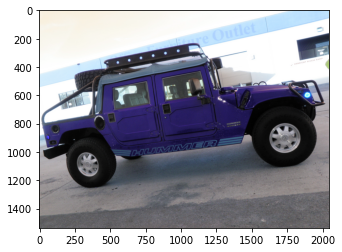

In [18]:
plt.imshow(cv2.imread(train_images_path[0], cv2.COLOR_BGR2RGB))

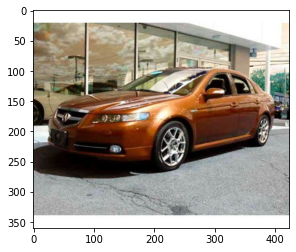

In [19]:
plt.imshow(cv2.imread(train_images_path[123], cv2.COLOR_BGR2RGB))

In [54]:
def train_image_with_class(number):
  for i in range(0,len(car_annotations_train['Image Name'])):
    if car_annotations_train['Image Name'][i] == train_images_path[number][-9:]:
      print("Train Image Class:", car_annotations_train['Image class'][i])
      plt.imshow(cv2.imread(train_images_path[number]))

Train Image Class: 1


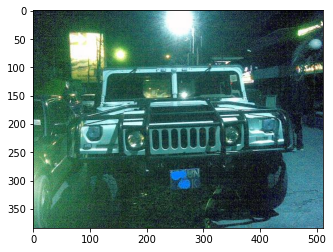

In [51]:
train_image_with_class(5)

Train Image Class: 3


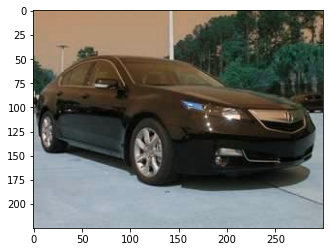

In [52]:
train_image_with_class(77)

Train Image Class: 5


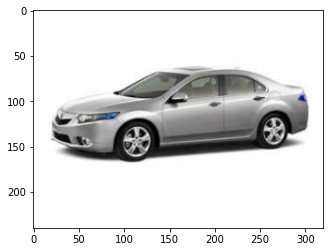

In [53]:
train_image_with_class(169)

- Step 3: Map training and testing images to its annotations. 


Draw Bounding Box

Function to select n number of images and find and their corresponding coordinates

In [45]:
TrainImageBB = []
for i in range(0,5):
  train_image_name= train_images_path[i][-9:]
  for j in range(0,len(car_annotations_train['Image Name'])):
    if car_annotations_train['Image Name'][j] == train_image_name:
      x1,y1,x2,y2 = car_annotations_train['Bounding Box coordinates'][j],car_annotations_train['Unnamed: 2'][j], car_annotations_train['Unnamed: 3'][j], car_annotations_train['Unnamed: 4'][j]
      trainimage = cv2.imread(train_images_path[i])
      cv2.rectangle(trainimage,(x1,y1),(x2,y2),(0,255,0),2) # add rectangle to image
      TrainImageBB.append(trainimage)

In [42]:
TestImageBB = []
for i in range(0,5):
  test_image_name= test_images_path[i][-9:]
  for j in range(0,len(car_annotations_test['Image Name'])):
    if car_annotations_test['Image Name'][j] == test_image_name:
      x1,y1,x2,y2 = car_annotations_test['Bounding Box coordinates'][j],car_annotations_test['Unnamed: 2'][j], car_annotations_test['Unnamed: 3'][j], car_annotations_test['Unnamed: 4'][j]
      testimage = cv2.imread(test_images_path[i])
      cv2.rectangle(testimage,(x1,y1),(x2,y2),(0,255,0),2) # add rectangle to image
      TestImageBB.append(testimage)

- Step 4: Display images with bounding box

Display Train Images with bounding box

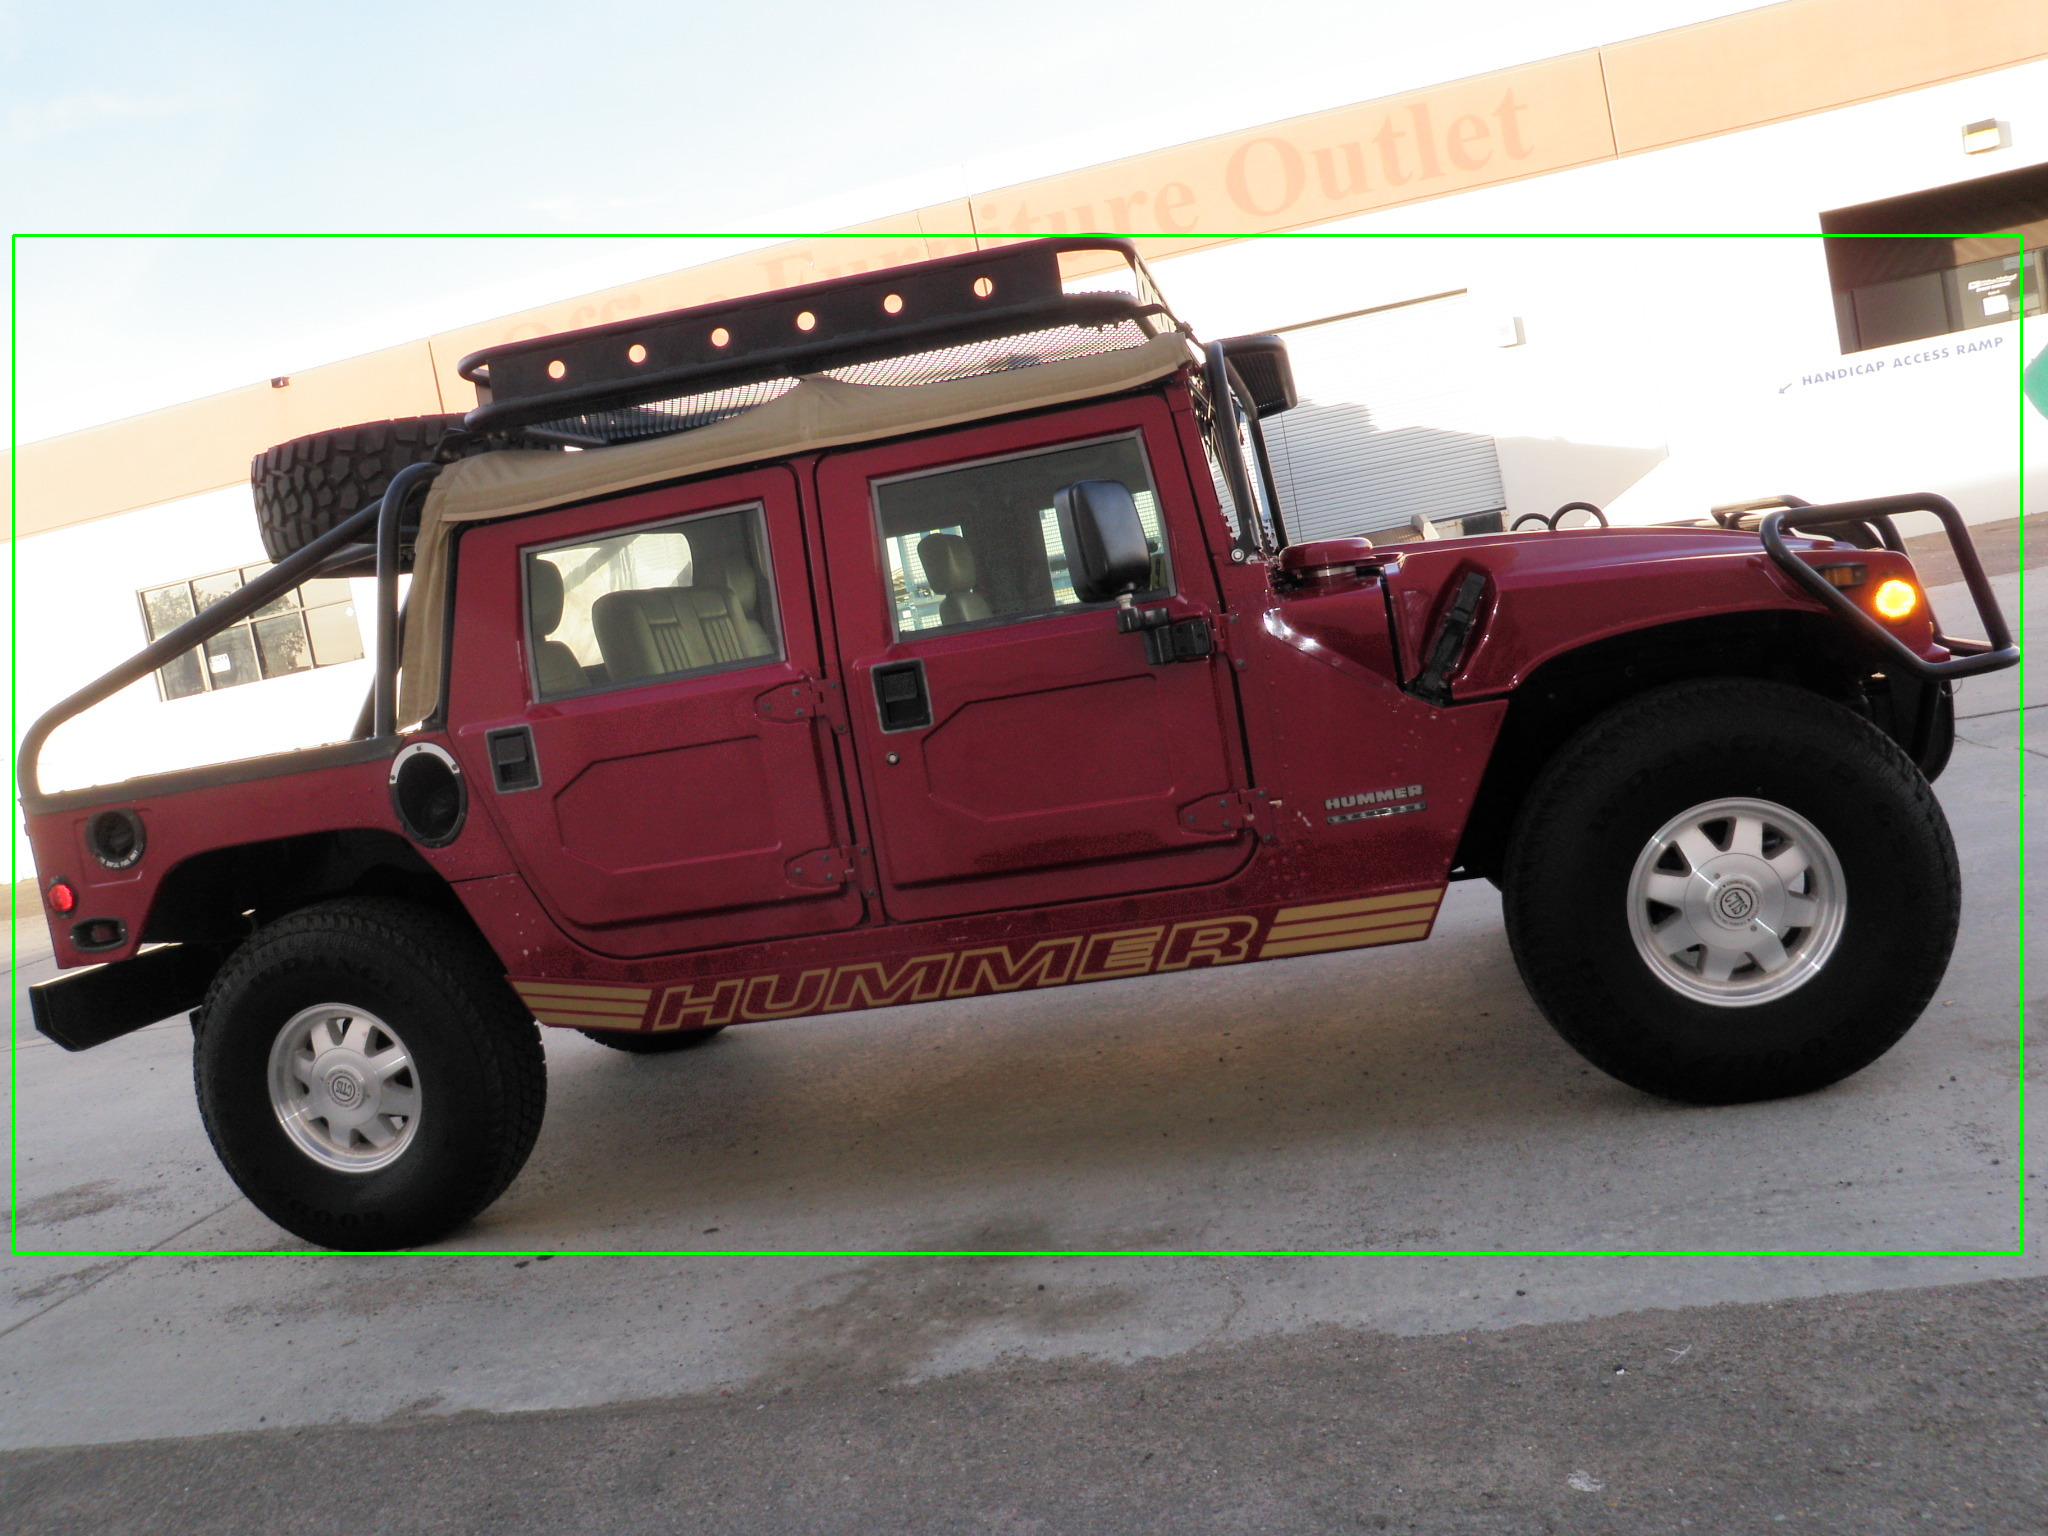

In [40]:
from google.colab.patches import cv2_imshow
cv2_imshow(TrainImageBB[0])

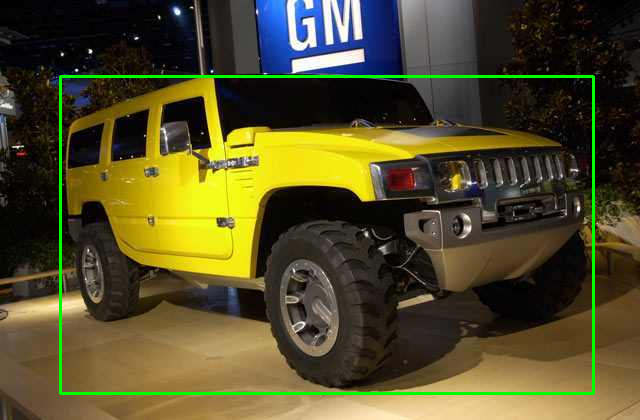

In [46]:
cv2_imshow(TrainImageBB[1])

Display Test Images with bounding box

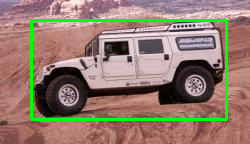

In [43]:
cv2_imshow(TestImageBB[0])

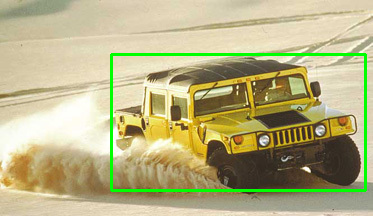

In [44]:
cv2_imshow(TestImageBB[1])

#### Output: 
Images mapped to its class and annotation ready to be used for deep learning